## **Prediction of Temperature in Friction Stir Spot Welding Process**
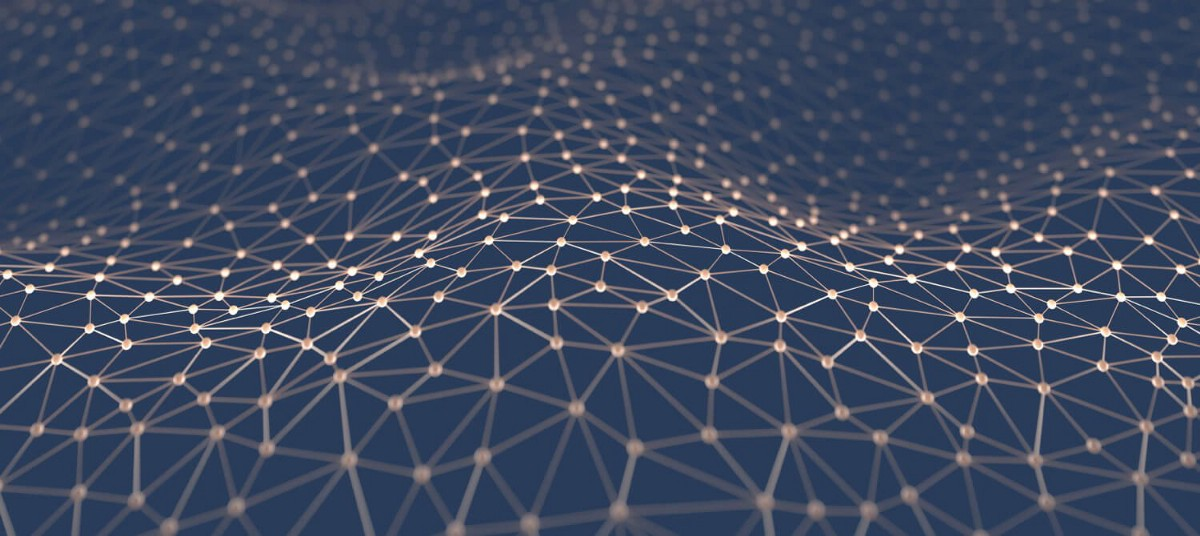

# **Support Vector Machines**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
tensile= pd.read_csv('Fsim.csv')

In [3]:
tensile.head()

,Rotational Speed,Dwelling Time,Axial Load,Temperature,Max Depth
0,1000,10,110,270,3.50
1,1000,10,120,279,4.01
2,1000,10,130,297,4.65
3,1000,20,110,292,3.96
4,1000,20,120,294,4.47


In [4]:
tensile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rotational Speed  27 non-null     int64  
 1   Dwelling Time     27 non-null     int64  
 2   Axial Load        27 non-null     int64  
 3   Temperature       27 non-null     int64  
 4   Max Depth         27 non-null     float64
dtypes: float64(1), int64(4)
memory usage: 1.2 KB


In [5]:
tensile.describe()

,Rotational Speed,Dwelling Time,Axial Load,Temperature,Max Depth
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,1500.000000,20.000000,120.000000,323.370370,4.875556
std,416.025147,8.320503,8.320503,27.174858,0.635134
min,1000.000000,10.000000,110.000000,270.000000,3.500000
25%,1000.000000,10.000000,110.000000,304.000000,4.460000
50%,1500.000000,20.000000,120.000000,322.000000,4.920000
75%,2000.000000,30.000000,130.000000,346.000000,5.305000
max,2000.000000,30.000000,130.000000,380.000000,6.000000


In [6]:
X = tensile[['Rotational Speed', 'Dwelling Time', 'Axial Load']]
y = tensile['Temperature']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [9]:
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [11]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 7.521314354101918
MSE: 105.19762107330449
RMSE: 10.25658915396851
R2 Square 0.8054298007275502
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0010679622546512118
MSE: 1.2059416610572344e-06
RMSE: 0.001098153751101017
R2 Square 0.9999999982860651
__________________________________


# **Random Forest Algorithm**

In [12]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 7.026333333333336
MSE: 99.02376333333343
RMSE: 9.951068451846437
R2 Square 0.8168487731196052
__________________________________
Train set evaluation:
_____________________________________
MAE: 3.375904761904762
MSE: 14.810084666666679
RMSE: 3.848387281273375
R2 Square 0.9789512867299189
__________________________________


#**Robust Regression**

In [14]:
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression

model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 4.168720657276992
MSE: 18.79496901449777
RMSE: 4.335316483775754
R2 Square 0.9652374185921743
__________________________________
Train set evaluation:
_____________________________________
MAE: 3.9751285490722186
MSE: 20.515244243237273
RMSE: 4.529375701268032
R2 Square 0.9708428747397044
__________________________________
